In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./teste/foto_imagem_inicial.bmp')
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img2 = img.copy()
# template = cv2.imread('./menu/bomb_menu.bmp',0) preto e brando
template = cv2.imread('./menu/bomb_menu.bmp')
h, w, chanels  = template.shape
# template = cv2.cvtColor(template, cv2.COLOR_RGB2BGR)

In [3]:
template.shape

(90, 65, 3)

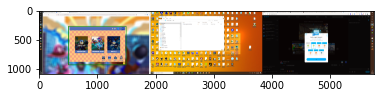

In [4]:

plt.imshow(img)
plt.show()

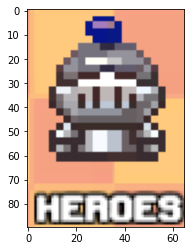

In [5]:
# plt.imshow(template, cmap='gray') preto e branco
plt.imshow(template)
plt.show()

In [6]:
# cv2.imshow('image',template)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
meth = "cv2.TM_CCORR_NORMED"
method = eval(meth)
res = cv2.matchTemplate(img,template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

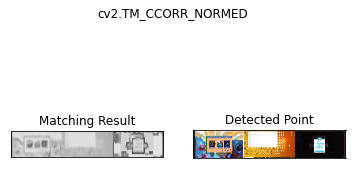

In [8]:

if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()

In [12]:
top_left, bottom_right

((1381, 762), (1446, 852))

In [9]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("teste.jpg", img)

True

In [10]:
# result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [13]:
import pyautogui, sys

In [33]:
x_esquerda = -1920
y_esquerda = 0 

pyautogui.moveTo(top_left[0] - (top_left[0] - bottom_right[0])/2 + x_esquerda , 
                 top_left[1] - ( top_left[1] - bottom_right[1])/2 + y_esquerda)
pyautogui.click()

In [35]:
def detectando_objeto(img, template):
    newImage = img.copy()
    h, w, chanels  = template.shape
    meth = "cv2.TM_CCORR_NORMED"
    method = eval(meth)
    res = cv2.matchTemplate(newImage,template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    cv2.rectangle(newImage,top_left, bottom_right, 255, 2)
    
    
    return (newImage, top_left, bottom_right)

In [43]:
img, top, bot = detectando_objeto(img,template)
cv2.imwrite("teste.jpg", img)

True

In [44]:
image = pyautogui.screenshot()
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
cv2.imwrite("in_memory_to_disk.png", image)

True